<a href="https://colab.research.google.com/github/chriswilson2020/PyTorchCoLab/blob/main/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Fri Dec  9 16:15:25 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    25W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

1.13.0+cu116


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

1. Food Inspection and Sorting using computer vision

2. Transportation i.e. self-driving

3. Helath Care - medical imaging

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

Overfitting refers to a model that models the training data too well i.e. it learns the detail and noise in the training data so well that it negatively impacts the performance of the model on new data. 

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1. Resaampling - i.e. k-fold cross validation to train and test the model on different subsets of training data
2. Validation dataset - subset of training data held back from the ML algorithm until the very end of hte project
3. Dropouts - modify the network by dropping neurons during training in each itteration. 

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

I used a ferarri - https://store.ferrari.com/product_image/343549805514497/F/w1080.jpg

it thought it was a lady bug

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor


In [4]:
train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

Number of training data samples: 60000 
Number of testing data samples: 10000
['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine'] 

{'0 - zero': 0, '1 - one': 1, '2 - two': 2, '3 - three': 3, '4 - four': 4, '5 - five': 5, '6 - six': 6, '7 - seven': 7, '8 - eight': 8, '9 - nine': 9} 

Image shape: torch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

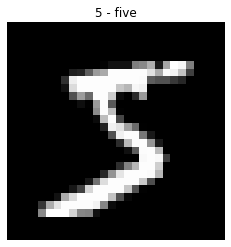

In [5]:
# lets just check the data is what we think it is first

print(f"Number of training data samples: {len(train_data)} \nNumber of testing data samples: {len(test_data)}")
class_names = train_data.classes
print(class_names, "\n")

class_to_idx = train_data.class_to_idx
print(class_to_idx, "\n")

import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

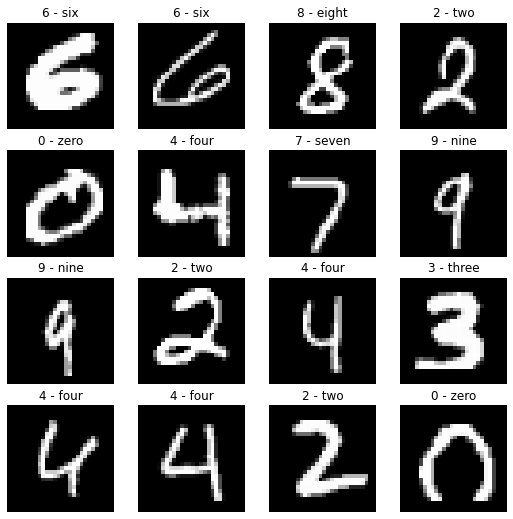

In [6]:
# Plot at more images
torch.manual_seed(42)

fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range (1, rows * cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [7]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

#Turn the datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False) # Don't shuffle test data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f44e9b31eb0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f44e9b31d90>)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [8]:
# Create a convolutional neural network based on TinyVGG
class MNISTModelV0(nn.Module):
  """
  Model architecture that replicates TinyVGG
  model from CNN explainer website.
  """

  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        # create a conv layer
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2 = nn.Sequential(
        # Create second conv layer
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )
  def forward(self, x):
    x = self.conv_block_1(x)
    #print(x.shape)
    x = self.conv_block_2(x)
    #print(x.shape)
    x = self.classifier(x)
    #print(x.shape)
    return x

# Figure out the hidden_units multiplier in nn.Linear

0. Remember to set `nn.Linear(in_features=hidden_units*0)` temporarily
1. Substantiate the model
2. Run a test set through it

In [9]:
# Substantiate the models

torch.manual_seed(42)

#substantiate a cpu model
model_0_cpu = MNISTModelV0(input_shape=1,
                       hidden_units=10,
                       output_shape=len(class_names)).cpu()

#substantite a gpu model
model_0_GPU = MNISTModelV0(input_shape=1,
                       hidden_units=10,
                       output_shape=len(class_names)).to(device)

In [10]:
# Create random tensor to figure out the multiplier
torch.manual_seed(42)
rand_image_tensor = torch.randn(size=(1,28,28))

# Run it through model_0 

model_0_GPU(rand_image_tensor.unsqueeze(0).to(device))

## output first time this is run should be mat1 and mat2 shapes can not be multiplied (1x490 and 0x10)
## However model also outputs final torch.Size([1,10,7,7]) we know 7 * 7 * 10 is 490


tensor([[-0.0171,  0.0028, -0.0295, -0.0175,  0.0284, -0.0896, -0.0346,  0.0146,
         -0.0779, -0.0134]], device='cuda:0', grad_fn=<AddmmBackward0>)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

### Setup the timer function

In [11]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds ")
  return total_time

### Setup loss function and optimizer

In [12]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer_cpu = torch.optim.SGD(params=model_0_cpu.parameters(),
                            lr=0.1)
optimizer_GPU = torch.optim.SGD(params=model_0_GPU.parameters(),
                            lr=0.1)

### Import the accuracy functon

In [13]:
import requests
from pathlib import Path

# Download helper functions from my own repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/chriswilson2020/PyTorchCoLab/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

# Import accuracy metric
from helper_functions import accuracy_fn


helper_functions.py already exists, skipping download...


### Setup our train and test step functions

In [14]:
# Train Step Function
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Performs training step with model trying to learn on data_loader."""
  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()

  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)
    
    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1)) # go from logits to prediciton labels
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss backward
    loss.backward()
    
    # 5. Optimizer step (update the model's parameters once *per batch*)
    optimizer.step()
    
    
  # Divide total train loss by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.2f} | Train acc: {train_acc:.2f}")

In [15]:
# Test Step Function
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """Performs a testing loop step on model going over data_loader."""

  test_loss, test_acc = 0, 0

  # Put the model in eval mode
  model.eval()

  # Run on inference mode context manager
  with torch.inference_mode():
    for X, y in data_loader:
      # Send the data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred = model(X)

      # 2. Calculate the loss/acc
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                           y_pred=test_pred.argmax(dim=1)) # go from logits -> prediciton labels

    # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.2f} | Test acc: {test_acc:.2f}")

### Setup the evaluation function


In [16]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make our data device agnostic
      X, y = X.to(device), y.to(device)
      # Make predicitons
      y_pred = model(X)

      # Accumulate loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc,
          "device": device}

### Build the testing loop


### The CPU version

In [17]:

# Import the tqdm progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 5

# Train and Test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  train_step(model=model_0_cpu,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer_cpu,
             accuracy_fn=accuracy_fn,
             device="cpu"
             )
  test_step(model=model_0_cpu,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device="cpu")
train_time_end_on_cpu = timer()

total_train_time_model_0_cpu = print_train_time(start=train_time_start_on_cpu,
                                                end=train_time_end_on_cpu,
                                                device="cpu")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
------
Train loss: 0.32 | Train acc: 89.30
Test loss: 0.08 | Test acc: 97.74
Epoch: 1
------
Train loss: 0.08 | Train acc: 97.46
Test loss: 0.06 | Test acc: 97.96
Epoch: 2
------
Train loss: 0.06 | Train acc: 98.09
Test loss: 0.06 | Test acc: 98.06
Epoch: 3
------
Train loss: 0.05 | Train acc: 98.28
Test loss: 0.05 | Test acc: 98.30
Epoch: 4
------
Train loss: 0.05 | Train acc: 98.47
Test loss: 0.04 | Test acc: 98.52
Train time on cpu: 179.188 seconds 


### Get the model results and save them

In [18]:
model_0_cpu_results = eval_model(
    model=model_0_cpu,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device="cpu"
)

model_0_cpu_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'MNISTModelV0',
 'model_loss': 0.04193798825144768,
 'model_acc': 98.5223642172524,
 'device': 'cpu'}

### The GPU Version

In [19]:
# Import the tqdm progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_GPU = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 5

# Train and Test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  train_step(model=model_0_GPU,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer_GPU,
             accuracy_fn=accuracy_fn,
             device=device
             )
  test_step(model=model_0_GPU,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
train_time_end_on_GPU = timer()

total_train_time_model_0_GPU = print_train_time(start=train_time_start_on_GPU,
                                                end=train_time_end_on_GPU,
                                                device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
------
Train loss: 0.28 | Train acc: 90.77
Test loss: 0.06 | Test acc: 98.16
Epoch: 1
------
Train loss: 0.07 | Train acc: 97.82
Test loss: 0.05 | Test acc: 98.47
Epoch: 2
------
Train loss: 0.05 | Train acc: 98.35
Test loss: 0.05 | Test acc: 98.47
Epoch: 3
------
Train loss: 0.05 | Train acc: 98.57
Test loss: 0.05 | Test acc: 98.59
Epoch: 4
------
Train loss: 0.04 | Train acc: 98.72
Test loss: 0.04 | Test acc: 98.63
Train time on cuda: 53.327 seconds 


### Evaluate the results for GPU model


In [20]:
model_0_GPU_results = eval_model(
    model=model_0_GPU,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_0_GPU_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'MNISTModelV0',
 'model_loss': 0.04057701677083969,
 'model_acc': 98.63218849840256,
 'device': 'cuda'}

### Compare the models

In [21]:
import pandas as pd

compare_results=pd.DataFrame([model_0_cpu_results,
                              model_0_GPU_results])

compare_results["training_time"] = [total_train_time_model_0_cpu,
                                    total_train_time_model_0_GPU]
                                    
compare_results

,model_name,model_loss,model_acc,device,training_time
0,MNISTModelV0,0.041938,98.522364,cpu,179.188208
1,MNISTModelV0,0.040577,98.632188,cuda,53.326772


### Visualize the model results

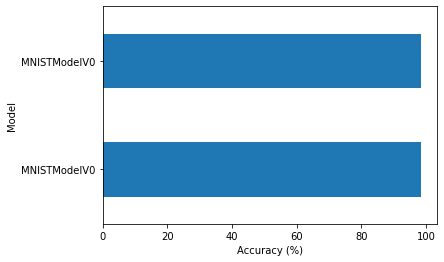

In [22]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("Accuracy (%)")
plt.ylabel("Model");


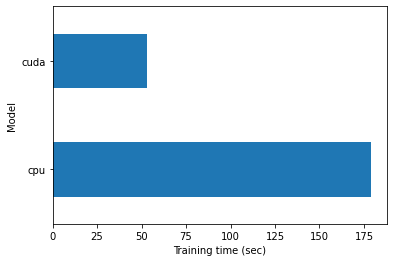

In [23]:
compare_results.set_index("device")["training_time"].plot(kind="barh")
plt.xlabel("Training time (sec)")
plt.ylabel("Model");

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

### Write the predicitons function

In [24]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample) # Remember with linear at the end of the function we output logits

      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

### Make random Dataset with 9 components

In [25]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

### Make some predictions with the 9 samples 

In [26]:
# Make predictions
pred_probs = make_predictions(model=model_0_GPU,
                              data=test_samples)

# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)

pred_classes

tensor([9, 5, 7, 1, 9, 8, 3, 0, 4])

In [27]:
test_labels

[9, 5, 7, 1, 9, 8, 3, 0, 4]

### Plot Predicitons

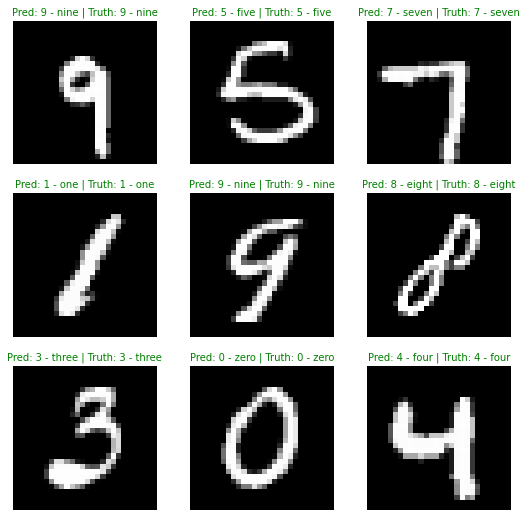

In [28]:
# Plot predictions 
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  #Find the prediticon 
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if predictions are same as truth
  else: 
    plt.title(title_text, fontsize=10, c="r")
  plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

### Make predictions for the confusion matrix

In [29]:
# Import tqdm.auto
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_0_GPU.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    # Send the data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_0_GPU(X)
    # Turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # Put the prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())
  
  # Concatenate list of predictions into a tensor
  #print(y_preds)
  y_pred_tensor = torch.cat(y_preds)
  print(y_pred_tensor)

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([7, 2, 1,  ..., 4, 5, 6])


### Add missing packages needed for confusion matrix

In [30]:
# See if required packages are installed and if not, install them...
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except: 
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.21.0


### Plot the confusion matrix

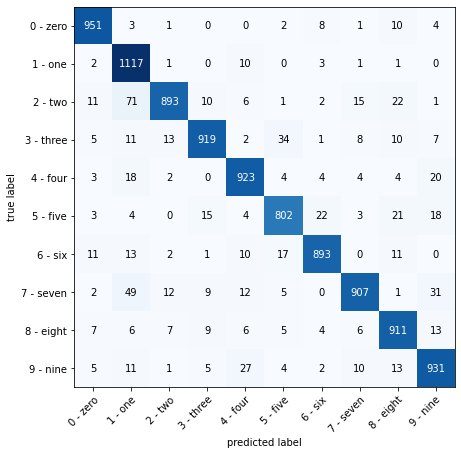

In [31]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names),
                          task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names=class_names,
    figsize=(10,7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

### Create the ransom tensor

In [32]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(1,3,64,64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([1, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.

### Visualise the tensor for funsies

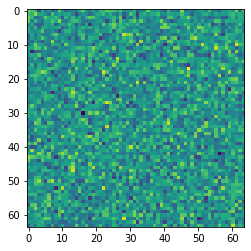

In [33]:
plt.imshow(test_image[0])

### Pass through `nn.Conv2d` 
With `kernel_size = 3`

In [34]:
torch.manual_seed(42)
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=1)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

With `kernel_size = 1`

In [35]:
torch.manual_seed(42)
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=1,
                       stride=1,
                       padding=1)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 66, 66])

### With `kernel_size = 6`

In [36]:
torch.manual_seed(42)
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=6,
                       stride=1,
                       padding=1)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 61, 61])

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

## 13.1 Build and train the model

#My Solutions

In [165]:
train_data = datasets.FASHIONMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FASHIONMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

AttributeError: ignored

## 13.1 Build and train the model 
# FROM SOLUTIONS

In [142]:
# Download FashionMNIST train & test
from torchvision import datasets
from torchvision import transforms

fashion_mnist_train = datasets.FashionMNIST(root=".",
                                            download=True,
                                            train=True,
                                            transform=transforms.ToTensor())

fashion_mnist_test = datasets.FashionMNIST(root=".",
                                           train=False,
                                           download=True,
                                           transform=transforms.ToTensor())

len(fashion_mnist_train), len(fashion_mnist_test)

(60000, 10000)

In [143]:
# Get the class names of the Fashion MNIST dataset
fashion_mnist_class_names = fashion_mnist_train.classes
fashion_mnist_class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [144]:
# Turn FashionMNIST datasets into dataloaders
from torch.utils.data import DataLoader

fashion_mnist_train_dataloader = DataLoader(fashion_mnist_train,
                                            batch_size=32,
                                            shuffle=True)

fashion_mnist_test_dataloader = DataLoader(fashion_mnist_test,
                                           batch_size=32,
                                           shuffle=False)

len(fashion_mnist_train_dataloader), len(fashion_mnist_test_dataloader)

(1875, 313)

In [145]:
# model_2 is the same architecture as MNIST_model
model_2 = MNISTModelV0(input_shape=1,
                      hidden_units=10,
                      output_shape=10).to(device)
model_2

MNISTModelV0(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [146]:
# Setup loss and optimizer
from torch import nn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01)

In [148]:
# Setup metrics
from tqdm.auto import tqdm
from torchmetrics import Accuracy

acc_fn = Accuracy(task='multiclass', num_classes=len(fashion_mnist_class_names)).to(device) 

# Setup training/testing loop
epochs = 5
for epoch in tqdm(range(epochs)):
  train_loss, test_loss_total = 0, 0
  train_acc, test_acc = 0, 0 

  ### Training
  model_2.train()
  for batch, (X_train, y_train) in enumerate(fashion_mnist_train_dataloader):
    X_train, y_train = X_train.to(device), y_train.to(device)

    # Forward pass and loss
    y_pred = model_2(X_train)
    loss = loss_fn(y_pred, y_train)
    train_loss += loss
    train_acc += acc_fn(y_pred, y_train)

    # Backprop and gradient descent
    optimizer.zero_grad()
    loss.backward() 
    optimizer.step()

  # Adjust the loss/acc (find the loss/acc per epoch)
  train_loss /= len(fashion_mnist_train_dataloader)
  train_acc /= len(fashion_mnist_train_dataloader)

  ### Testing
  model_2.eval()
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(fashion_mnist_test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)

      # Forward pass and loss
      y_pred_test = model_2(X_test)
      test_loss = loss_fn(y_pred_test, y_test)
      test_loss_total += test_loss

      test_acc += acc_fn(y_pred_test, y_test)
  
    # Adjust the loss/acc (find the loss/acc per epoch)
    test_loss /= len(fashion_mnist_test_dataloader)
    test_acc /= len(fashion_mnist_test_dataloader)
    
  # Print out what's happening
  print(f"Epoch: {epoch} | Train loss: {train_loss:.3f} | Train acc: {train_acc:.2f} | Test loss: {test_loss_total:.3f} | Test acc: {test_acc:.2f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.718 | Train acc: 0.39 | Test loss: 226.391 | Test acc: 0.75
Epoch: 1 | Train loss: 0.616 | Train acc: 0.78 | Test loss: 171.259 | Test acc: 0.80
Epoch: 2 | Train loss: 0.475 | Train acc: 0.83 | Test loss: 147.608 | Test acc: 0.83
Epoch: 3 | Train loss: 0.422 | Train acc: 0.85 | Test loss: 129.717 | Test acc: 0.85
Epoch: 4 | Train loss: 0.393 | Train acc: 0.86 | Test loss: 129.060 | Test acc: 0.85


In [149]:
# Make predictions with trained model_2
test_preds = []
model_2.eval()
with torch.inference_mode():
  for X_test, y_test in tqdm(fashion_mnist_test_dataloader):
    y_logits = model_2(X_test.to(device))
    y_pred_probs = torch.softmax(y_logits, dim=1)
    y_pred_labels = torch.argmax(y_pred_probs, dim=1)
    test_preds.append(y_pred_labels)
test_preds = torch.cat(test_preds).cpu() # matplotlib likes CPU
test_preds[:10], len(test_preds)    

  0%|          | 0/313 [00:00<?, ?it/s]

(tensor([7, 2, 1, 1, 6, 1, 4, 6, 5, 7]), 10000)

In [150]:
# Get wrong prediction indexes
import numpy as np
wrong_pred_indexes = np.where(test_preds != fashion_mnist_test.targets)[0]
len(wrong_pred_indexes)

1521

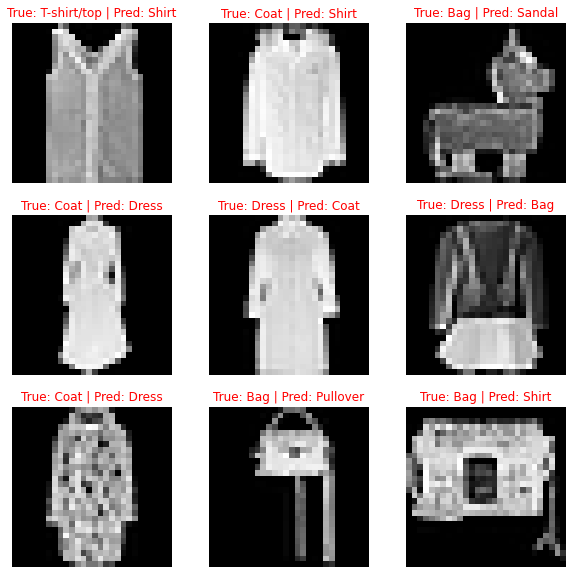

In [151]:
# Select random 9 wrong predictions and plot them
import random
random_selection = random.sample(list(wrong_pred_indexes), k=9)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_selection):
  # Get true and pred labels
  true_label = fashion_mnist_class_names[fashion_mnist_test[idx][1]]
  pred_label = fashion_mnist_class_names[test_preds[idx]]

  # Plot the wrong prediction with its original label
  plt.subplot(3, 3, i+1)
  plt.imshow(fashion_mnist_test[idx][0].squeeze(), cmap="gray")
  plt.title(f"True: {true_label} | Pred: {pred_label}", c="r")
  plt.axis(False);

In [163]:
# Make predictions across all test data
from tqdm.auto import tqdm
model_1.eval()
y_preds = []
with torch.inference_mode():
  for batch, (X, y) in tqdm(enumerate(fashion_mnist_test_dataloader)):
    # Make sure data on right device
    X, y = X.to(device), y.to(device)
    # Forward pass
    y_pred_logits = model_1(X)
    # Logits -> Pred probs -> Pred label
    y_pred_labels = torch.argmax(torch.softmax(y_pred_logits, dim=1), dim=1)
    # Append the labels to the preds list
    y_preds.append(y_pred_labels)
  y_preds=torch.cat(y_preds).cpu()
len(y_preds) 

0it [00:00, ?it/s]

10000

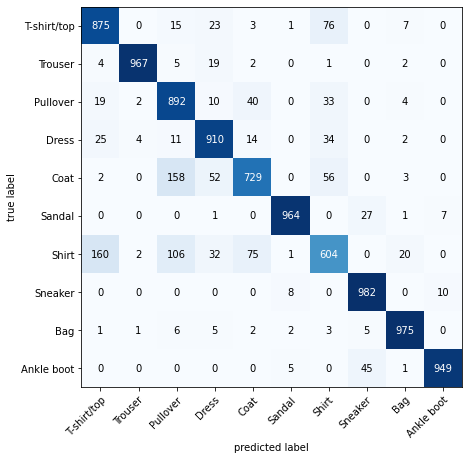

In [164]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix 
confmat = ConfusionMatrix(task='multiclass', 
                          num_classes=len(fashion_mnist_class_names))
confmat_tensor = confmat(preds=y_preds,
                         target=fashion_mnist_test.targets)

# Plot the confusion matrix
fix, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=fashion_mnist_class_names,
    figsize=(10, 7)
)